Імпорт бібліотек

In [1]:
import pandas as pd

<div style="font-family: Arial, sans-serif; line-height: 1.6;">
    <h2>Задача 1: Загрузка та обробка даних енергозабезпечення</h2>
    <p>
        1. Завантажити файл з даними про споживання енергії <code>"En_In.xls"</code>, який містить 
        показники енергозабезпечення та виробництва відновлюваної електроенергії, і ввести їх в DataFrame.
        Врахуйте, що це файл Excel, а не .csv. Також необхідно не включати інформацію з нижніх та верхніх 
        рядків файлу даних. Перші два стовпці непотрібні, тому їх необхідно виключити з датафрейму. Після цього 
        слід змінити мітки стовпців на наступні: <code>['Country', 'Energy Supply', 'Energy Supply per Capita', '%Renewable']</code>.
    </p>
    <pre>
import pandas as pd

# Завантаження даних
df = pd.read_excel('En_In.xls', skiprows=16, usecols='C:F')

# Перейменування стовпців
df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
df.head()
    </pre>

    <p>
        2. Перевести дані з стовпчика <code>'Energy Supply'</code> в гДж. Примітка: 1 ПДж = 1000000 ГДж.
        Для всіх країн, де відсутні дані (наприклад, "....."), потрібно замінити ці значення на <code>np.NaN</code>.
    </p>
    <pre>
import numpy as np

# Заміна "....." на np.NaN
df['Energy Supply'] = pd.to_numeric(df['Energy Supply'], errors='coerce')

# Переведення в гДж (1 ПДж = 1 000 000 ГДж)
df['Energy Supply'] *= 1000000
df.head()
    </pre>
    <p>
        3. Перейменувати наступні країни:
        <ul>
            <li>"Republic of Korea" на "South Korea"</li>
            <li>"United States of America" на "United States"</li>
            <li>"United Kingdom of Great Britain and Northern Ireland" на "United Kingdom"</li>
            <li>"China, Hong Kong Special Administrative Region" на "Hong Kong"</li>
        </ul>
    </p>
    <pre>
# Перейменування країн
df['Country'] = df['Country'].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
})
df.head()
    </pre>
    <p>
        4. Деякі країни мають в назві цифри та/або дужки. Ці символи потрібно видалити. Наприклад:
        <ul>
            <li>'Bolivia (Plurinational State of)' повинна бути 'Bolivia'</li>
            <li>'Switzerland17' повинна бути 'Switzerland'</li>
        </ul>
    </p>
    <pre>
# Видалення цифр та дужок з назв країн
df['Country'] = df['Country'].replace({
    r'\(.*\)': '',  # видалити текст в дужках
    r'\d+': ''  # видалити цифри
}, regex=True)

df['Country'] = df['Country'].str.strip()  # Видалити пробіли на початку та в кінці
df.head()
    </pre>

</div>


In [2]:


#Task 1
file_path = "En_In.xlsx"

en_in_df = pd.read_excel(file_path, skiprows=16, nrows=(245 - 17))

en_in_df = en_in_df.iloc[:, 2:]


en_in_df.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

en_in_df = en_in_df.drop(index=0)


#Task 2
en_in_df['Energy Supply'] = pd.to_numeric(en_in_df['Energy Supply'], errors='coerce') 
en_in_df['Energy Supply per Capita'] = pd.to_numeric(en_in_df['Energy Supply per Capita'], errors='coerce')
en_in_df['Energy Supply'] = en_in_df['Energy Supply'] * 1_000_000


#Task 3
country_rename_map = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}


en_in_df['Country'] = en_in_df['Country'].replace(country_rename_map)


#Task 4
en_in_df['Country'] = en_in_df['Country'].str.replace(r'\(.*\)', '', regex=True)  
en_in_df['Country'] = en_in_df['Country'].str.replace(r'\d+', '', regex=True)    


en_in_df['Country'] = en_in_df['Country'].str.strip()


print(en_in_df.to_string())

                                                  Country  Energy Supply  Energy Supply per Capita % Renewable
1                                             Afghanistan   3.210000e+08                      10.0    78.66928
2                                                 Albania   1.020000e+08                      35.0         100
3                                                 Algeria   1.959000e+09                      51.0     0.55101
4                                          American Samoa            NaN                       NaN    0.641026
5                                                 Andorra   9.000000e+06                     121.0    88.69565
6                                                  Angola   6.420000e+08                      27.0    70.90909
7                                                Anguilla   2.000000e+06                     136.0           0
8                                     Antigua and Barbuda   8.000000e+06                      84.0           0
9

Далі, завантажте дані про ВВП з файлу „gpd.csv”, що містить дані
Світового банку про ВВП країн від 1960 до 2015 року.


In [3]:
gpd_df = pd.read_csv('gpd.csv', skiprows=4)

country_rename = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}
gpd_df['Country Name'] = gpd_df['Country Name'].replace(country_rename)


print(gpd_df.iloc[:, :11].head())

  Country Name Country Code                            Indicator Name  \
0        Aruba          ABW  GDP at market prices (constant 2010 US$)   
1      Andorra          AND  GDP at market prices (constant 2010 US$)   
2  Afghanistan          AFG  GDP at market prices (constant 2010 US$)   
3       Angola          AGO  GDP at market prices (constant 2010 US$)   
4      Albania          ALB  GDP at market prices (constant 2010 US$)   

   Indicator Code  1960  1961  1962  1963  1964  1965  1966  
0  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4  NY.GDP.MKTP.KD   NaN   NaN   NaN   NaN   NaN   NaN   NaN  


6. Завантажте дані з файлу „scimagojr.xlsx”, який класифікує країни на основі
їхніх публікацій в журналах у галузі енергетичного машинобудування та
енергетичних технологій

In [4]:
scimagojr_df = pd.read_excel('scimagojr.xlsx')
gpd_df = gpd_df.rename(columns={'Country Name': 'Country'})

merged_df = en_in_df.merge(gpd_df, on='Country', how='inner').merge(scimagojr_df, on='Country', how='inner')
filtered_df = merged_df[(merged_df['Rank'] >= 1) & (merged_df['Rank'] <= 15)].sort_values(by='Rank')
filtered_df = filtered_df.set_index('Country')
nessecarry_coulms = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                     'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

filtered_df = filtered_df[nessecarry_coulms]
print(filtered_df.head())

                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
Japan                  3      30504              30287     223024   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   

                    Self-citations  Citations per document  H index  \
Country                                                               
China                       411683                    4.70      138   
Japan                        61554                    7.31      134   
Russian Federation           12422                    1.85       57   
Canada                       40930                   12.01      149   
Germany                      27426                    8.26      126   

                  

8. Створіть функцію, щоб визначити середній ВВП країн за останні 10 років

In [12]:
def task_eight():
    years = [str(year) for year in range(2006, 2016)]
    filtered_df['avgGDP'] = filtered_df[years].mean(axis=1)
    sorted_avg_gdp = filtered_df['avgGDP'].sort_values(ascending=False)
    return sorted_avg_gdp

avg_gdp_series = task_eight()
print(avg_gdp_series)

Country
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64


9. Створіть функцію, щоб визначити, наскільки змінився ВВП за останні 10 років для країни з 5-м середнім ВВП.

In [13]:
def gdp_change_for_5th_country(filtered_df, avg_gdp_series):
    country = avg_gdp_series.index[3]  
    gdp_change = filtered_df.loc[country, '2015'] - filtered_df.loc[country, '2006']
    return (country, gdp_change)

country, gdp_change = gdp_change_for_5th_country(filtered_df, avg_gdp_series)
print(country, gdp_change)

France 153345695364.24023


10. Створіть функцію, щоб визначити, в якій країні встановлено максимум
поновлюваних джерел енергії (% Renewable) та який саме відсоток.

In [9]:
def max_renewable_country(df):
    max_renewable = df['% Renewable'].idxmax()
    return (max_renewable, df.loc[max_renewable, '% Renewable'])

country, renewable = max_renewable_country(filtered_df)
print(country, renewable)

Brazil 69.64803


11. Створіть стовпець, в якому оцінюється чисельність населення. Для
пошуку оцінки використовуйте значення енергопостачання (Energy Supply)
та енергопостачання на душу населення (Energy Supply per capita). Яка країна є шостою за цією оцінкою?


In [11]:
def population_estimation(df):
    df['Population'] = df['Energy Supply'] / df['Energy Supply per Capita']
    sixth_country = df['Population'].sort_values(ascending=False).index[4]
    return (sixth_country, df.loc[sixth_country, 'Population'])

country, population = population_estimation(filtered_df)
print(country, population)

Japan 127409395.97315437


12. Створіть стовпець, в якому оцінюється кількість цитованих документів на
одну особу. Який взаємозв'язок між кількістю цитованих документів на
душу населення та енергозабезпеченням на душу населення? Використовуйте
метод .corr () (кореляція Пірсона).

In [99]:
def citations_correlation(df):
    df['Citable docs per Capita'] = df['Citable documents'] / df['Population']
    correlation = df['Citable docs per Capita'].corr(df['Energy Supply per Capita'])
    return correlation

correlation = citations_correlation(filtered_df)
print(correlation)

0.7940010435442942


13. Створіть новий стовпчик в який занесіть 1, якщо значення %
відновлюваної енергії (% Renewable) країни дорівнює або вище медіани для
всіх країн, і 0, якщо значення (% Renewable) нижче медіани.

In [104]:
def renewable_energy_classification(filtered_df):
    median_renewable = filtered_df['% Renewable'].median()
    filtered_df['Renewable Above Median'] = (filtered_df['% Renewable'] >= median_renewable).astype(int)
    sorted_df = filtered_df.sort_values(by='Rank')
    return sorted_df['Renewable Above Median']

renewable_series = renewable_energy_classification(filtered_df)
print(renewable_series)

Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
                     ..
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Above Median, Length: 15, dtype: int64


14. Використайте наступний словник, щоб згрупувати країни за
континентами, потім створіть DataFrame, який відображає розмір вибірки
(кількість країн на кожному континенті), а також суму, середнє та стандартне
відхилення для оцінки кількості населення для кожної країни.


In [18]:
import numpy as np

def population_statistics(filtered_df):
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }

    filtered_df['Continent'] = filtered_df.index.map(ContinentDict)

    filtered_df['Population'] = filtered_df['Energy Supply'] / filtered_df['Energy Supply per Capita']

    continent_stats = filtered_df.groupby('Continent')['Population'].agg(
        size='count',  
        sum='sum',     
        mean='mean',  
        std='std'      
    ).reset_index()

    continent_stats = continent_stats.set_index('Continent')
    return continent_stats

continent_stats_df = population_statistics(filtered_df)
print(continent_stats_df)

               size           sum          mean           std
Continent                                                    
Asia              5  2.898666e+09  5.797333e+08  6.790979e+08
Australia         1  2.331602e+07  2.331602e+07           NaN
Europe            5  3.940587e+08  7.881174e+07  3.813228e+07
North America     1  3.523986e+07  3.523986e+07           NaN
South America     1  2.059153e+08  2.059153e+08           NaN
                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
Japan                  3      30504              30287     223024   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France        

15. Створіть бульбашкову діаграму, що відображає залежність % поновлюван
их джерел від рейтингу країни (% Renewable vs. Rank). Розмір бульбашки від
повідає ВВП країн 2015 року, а колір відповідає континенту.


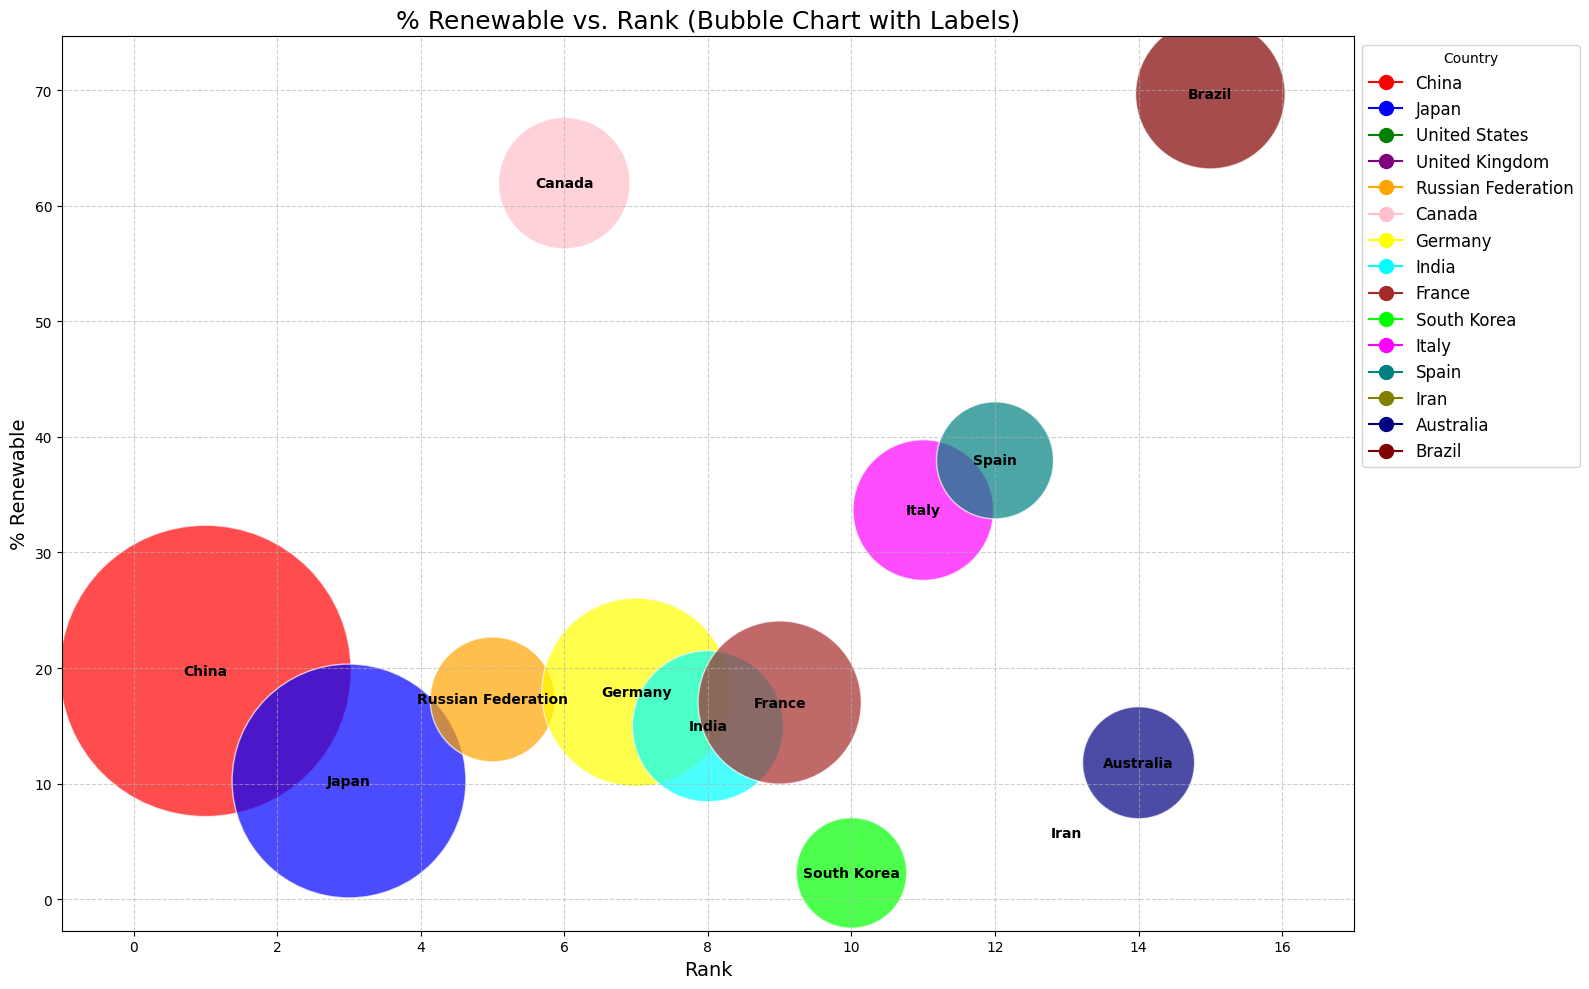

In [16]:
import matplotlib.pyplot as plt

def bubble_chart_with_labels(filtered_df):
    country_colors = {
        'China': 'red',
        'Japan': 'blue',
        'United States': 'green',
        'United Kingdom': 'purple',
        'Russian Federation': 'orange',
        'Canada': 'pink',
        'Germany': 'yellow',
        'India': 'cyan',
        'France': 'brown',
        'South Korea': 'lime',
        'Italy': 'magenta',
        'Spain': 'teal',
        'Iran': 'olive',
        'Australia': 'navy',
        'Brazil': 'maroon'
    }

    filtered_df['Color'] = filtered_df.index.map(country_colors)
    plt.figure(figsize=(16, 10))

    scatter = plt.scatter(
        filtered_df['Rank'], 
        filtered_df['% Renewable'], 
        s=filtered_df['2015'] / 2e8,  
        c=filtered_df['Color'],       
        alpha=0.7,                   
        edgecolors="w",               
        linewidth=1
    )

    for i, row in filtered_df.iterrows():
        plt.text(
            row['Rank'], row['% Renewable'], i, 
            fontsize=10, ha='center', va='center', color='black', weight='bold'
        )

    plt.title('% Renewable vs. Rank (Bubble Chart with Labels)', fontsize=18)
    plt.xlabel('Rank', fontsize=14)
    plt.ylabel('% Renewable', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.xlim(filtered_df['Rank'].min() - 2, filtered_df['Rank'].max() + 2)
    plt.ylim(filtered_df['% Renewable'].min() - 5, filtered_df['% Renewable'].max() + 5)

    handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, label=country)
               for country, color in country_colors.items()]
    plt.legend(handles=handles, title='Country', fontsize=12, loc='upper left', bbox_to_anchor=(1, 1))

    plt.tight_layout()
    plt.show()

bubble_chart_with_labels(filtered_df)